# 用训练好的模型预测12.06-12.11的数据

In [1]:
from sklearn.externals import joblib

rf=joblib.load(r'C:\Users\Jeremy\Desktop\rf_all.pickle')
estimator=joblib.load(r'C:\Users\Jeremy\Desktop\estimator_all.pickle')
bc=joblib.load(r'C:\Users\Jeremy\Desktop\bc_all.pickle')
rf2=joblib.load(r'C:\Users\Jeremy\Desktop\rf2_all.pickle')

D:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_title_chuzuche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=pd.merge(df_chuzuche_feature,df_chuzuche_time_feature,how='inner',on='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_title_shehuiche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=pd.merge(df_shehuiche_feature,df_shehuiche_time_feature,how='inner',on='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_results_all.csv')

949611 data points and 40 features
12038 positive out of 949611 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21545221    1.0       0.503         0.0       0.798       0.535    0.346000
21533559    1.0       0.534         0.0       0.833       0.518    0.350667
21534659    1.0       0.368         1.0       0.811       0.397    0.588333
21546250    1.0       0.432         0.0       0.643       0.438    0.290000
21528498    1.0       0.489         0.0       0.902       0.498    0.329000
...         ...         ...         ...         ...         ...         ...
21715205    0.0       0.000         0.0       0.001       0.000    0.000000
24010573    0.0       0.000         0.0       0.376       0.000    0.000000
21428917    0.0       0.000         0.0       0.003       0.000    0.000000
28031624    0.0       0.000       

In [3]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_title_chuzuche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=pd.merge(df_chuzuche_feature,df_chuzuche_time_feature,how='inner',on='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_title_shehuiche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=pd.merge(df_shehuiche_feature,df_shehuiche_time_feature,how='inner',on='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_results_all.csv')

949741 data points and 40 features
12066 positive out of 949741 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21520741    1.0       0.541         0.0       0.876       0.546    0.362333
21417202    1.0       0.360         0.0       0.823       0.378    0.246000
21527060    1.0       0.531         0.0       0.840       0.544    0.358333
21526276    1.0       0.461         1.0       0.816       0.459    0.640000
21553527    1.0       0.546         1.0       0.925       0.556    0.700667
...         ...         ...         ...         ...         ...         ...
22473514    0.0       0.000         0.0       0.002       0.000    0.000000
24214738    0.0       0.000         0.0       0.000       0.000    0.000000
21994999    0.0       0.000         0.0       0.000       0.000    0.000000
22475994    0.0       0.000       

In [4]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_title_chuzuche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=pd.merge(df_chuzuche_feature,df_chuzuche_time_feature,how='inner',on='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_title_shehuiche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=pd.merge(df_shehuiche_feature,df_shehuiche_time_feature,how='inner',on='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_results_all.csv')

945228 data points and 40 features
12030 positive out of 945228 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21404880    1.0       0.553         0.0       0.844       0.535    0.362667
21549273    1.0       0.447         0.0       0.798       0.423    0.290000
21704610    1.0       0.568         0.0       0.873       0.563    0.377000
21527060    1.0       0.479         0.0       0.831       0.513    0.330667
21522952    1.0       0.518         0.0       0.828       0.498    0.338667
...         ...         ...         ...         ...         ...         ...
22808568    0.0       0.000         0.0       0.014       0.000    0.000000
23261654    0.0       0.000         0.0       0.000       0.000    0.000000
22926864    0.0       0.000         0.0       0.017       0.000    0.000000
22570919    0.0       0.000       

In [5]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_title_chuzuche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=pd.merge(df_chuzuche_feature,df_chuzuche_time_feature,how='inner',on='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_title_shehuiche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=pd.merge(df_shehuiche_feature,df_shehuiche_time_feature,how='inner',on='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_results_all.csv')

966316 data points and 40 features
12051 positive out of 966316 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21545221    1.0       0.486         0.0       0.755       0.489    0.325000
21522952    1.0       0.476         0.0       0.720       0.489    0.321667
21457066    1.0       0.510         0.0       0.871       0.505    0.338333
21717676    1.0       0.562         1.0       0.926       0.575    0.712333
22381640    1.0       0.624         1.0       0.945       0.624    0.749333
...         ...         ...         ...         ...         ...         ...
21956223    0.0       0.000         0.0       0.001       0.000    0.000000
23245538    0.0       0.000         0.0       0.000       0.000    0.000000
23151497    0.0       0.000         0.0       0.006       0.000    0.000000
23344634    0.0       0.000       

In [6]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_title_chuzuche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=pd.merge(df_chuzuche_feature,df_chuzuche_time_feature,how='inner',on='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_title_shehuiche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=pd.merge(df_shehuiche_feature,df_shehuiche_time_feature,how='inner',on='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_results_all.csv')

894310 data points and 40 features
12031 positive out of 894310 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21417202    1.0       0.445         0.0       0.773       0.454    0.299667
21522952    1.0       0.561         0.0       0.854       0.575    0.378667
21546250    1.0       0.499         1.0       0.826       0.518    0.672333
21651679    1.0       0.494         0.0       0.851       0.475    0.323000
21559243    1.0       0.621         0.0       0.911       0.633    0.418000
...         ...         ...         ...         ...         ...         ...
23462160    0.0       0.000         1.0       0.097       0.000    0.333333
21770696    0.0       0.000         0.0       0.000       0.000    0.000000
22873705    0.0       0.000         0.0       0.002       0.000    0.000000
23572297    0.0       0.000       

In [7]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_title_chuzuche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=pd.merge(df_chuzuche_feature,df_chuzuche_time_feature,how='inner',on='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_title_shehuiche_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_time_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=pd.merge(df_shehuiche_feature,df_shehuiche_time_feature,how='inner',on='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_results_all.csv')

814792 data points and 40 features
12000 positive out of 814792 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21533003    1.0       0.544         0.0       0.822       0.572    0.372000
21404880    1.0       0.562         0.0       0.854       0.535    0.365667
21545221    1.0       0.566         0.0       0.823       0.588    0.384667
21751290    1.0       0.578         1.0       0.908       0.581    0.719667
22365238    1.0       0.491         1.0       0.871       0.458    0.649667
...         ...         ...         ...         ...         ...         ...
21856045    0.0       0.001         0.0       0.008       0.000    0.000333
24151418    0.0       0.000         0.0       0.002       0.000    0.000000
25522049    0.0       0.000         0.0       0.000       0.000    0.000000
21898981    0.0       0.000       

# 将12.05-12.11的预测结果合并

In [2]:
import pandas as pd
import numpy as np

results_1205=pd.read_csv(open(r'F:\运营车识别\2019.12.18\20161205_results_all.csv'),header=0)
results_1205.rename(columns={'truth':'truth_05', 'label':'label_05', 'output_std':'output_std_05', 'output_bag':'output_bag_05', 
                             'output_skb':'output_skb_05', 'output_stp':'output_stp_05', 'output_all':'output_all_05'}, inplace = True)
results_1206=pd.read_csv(open(r'F:\运营车识别\2019.12.18\20161206_results_all.csv'),header=0)
results_1206.rename(columns={'truth':'truth_06', 'output_std':'output_std_06', 'output_bag':'output_bag_06', 
                             'output_skb':'output_skb_06', 'output_stp':'output_stp_06', 'output_all':'output_all_06'}, inplace = True)
results_1207=pd.read_csv(open(r'F:\运营车识别\2019.12.18\20161207_results_all.csv'),header=0)
results_1207.rename(columns={'truth':'truth_07', 'output_std':'output_std_07', 'output_bag':'output_bag_07', 
                             'output_skb':'output_skb_07', 'output_stp':'output_stp_07', 'output_all':'output_all_07'}, inplace = True)
results_1208=pd.read_csv(open(r'F:\运营车识别\2019.12.18\20161208_results_all.csv'),header=0)
results_1208.rename(columns={'truth':'truth_08', 'output_std':'output_std_08', 'output_bag':'output_bag_08', 
                             'output_skb':'output_skb_08', 'output_stp':'output_stp_08', 'output_all':'output_all_08'}, inplace = True)
results_1209=pd.read_csv(open(r'F:\运营车识别\2019.12.18\20161209_results_all.csv'),header=0)
results_1209.rename(columns={'truth':'truth_09', 'output_std':'output_std_09', 'output_bag':'output_bag_09', 
                             'output_skb':'output_skb_09', 'output_stp':'output_stp_09', 'output_all':'output_all_09'}, inplace = True)
results_1210=pd.read_csv(open(r'F:\运营车识别\2019.12.18\20161210_results_all.csv'),header=0)
results_1210.rename(columns={'truth':'truth_10', 'output_std':'output_std_10', 'output_bag':'output_bag_10', 
                             'output_skb':'output_skb_10', 'output_stp':'output_stp_10', 'output_all':'output_all_10'}, inplace = True)
results_1211=pd.read_csv(open(r'F:\运营车识别\2019.12.18\20161211_results_all.csv'),header=0)
results_1211.rename(columns={'truth':'truth_11', 'output_std':'output_std_11', 'output_bag':'output_bag_11', 
                             'output_skb':'output_skb_11', 'output_stp':'output_stp_11', 'output_all':'output_all_11'}, inplace = True)

In [3]:
print('1206总出租车数量：%d'%(len(results_1206[results_1206['truth_06']==1])))
print('1206识别出的出租车数量：%d'%(len(results_1206[(results_1206['output_bag_06']==1) & (results_1206['truth_06']==1)])))
print('1206出租车识别准确率：%f'%(len(results_1206[(results_1206['output_bag_06']==1) & (results_1206['truth_06']==1)])/len(results_1206[results_1206['truth_06']==1])))
print('1206总社会车数量：%d'%(len(results_1206[results_1206['truth_06']==0])))
print('1206社会车中识别出的运营车数量：%d'%(len(results_1206[(results_1206['output_bag_06']==1) & (results_1206['truth_06']==0)])))
print('1206社会车中运营比例：%f'%(len(results_1206[(results_1206['output_bag_06']==1) & (results_1206['truth_06']==0)])/len(results_1206[results_1206['truth_06']==0])))

print('1207总出租车数量：%d'%(len(results_1207[results_1207['truth_07']==1])))
print('1207识别出的出租车数量：%d'%(len(results_1207[(results_1207['output_bag_07']==1) & (results_1207['truth_07']==1)])))
print('1207出租车识别准确率：%f'%(len(results_1207[(results_1207['output_bag_07']==1) & (results_1207['truth_07']==1)])/len(results_1207[results_1207['truth_07']==1])))
print('1207总社会车数量：%d'%(len(results_1207[results_1207['truth_07']==0])))
print('1207社会车中识别出的运营车数量：%d'%(len(results_1207[(results_1207['output_bag_07']==1) & (results_1207['truth_07']==0)])))
print('1207社会车中运营比例：%f'%(len(results_1207[(results_1207['output_bag_07']==1) & (results_1207['truth_07']==0)])/len(results_1207[results_1207['truth_07']==0])))

print('1208总出租车数量：%d'%(len(results_1208[results_1208['truth_08']==1])))
print('1208识别出的出租车数量：%d'%(len(results_1208[(results_1208['output_bag_08']==1) & (results_1208['truth_08']==1)])))
print('1208出租车识别准确率：%f'%(len(results_1208[(results_1208['output_bag_08']==1) & (results_1208['truth_08']==1)])/len(results_1208[results_1208['truth_08']==1])))
print('1208总社会车数量：%d'%(len(results_1208[results_1208['truth_08']==0])))
print('1208社会车中识别出的运营车数量：%d'%(len(results_1208[(results_1208['output_bag_08']==1) & (results_1208['truth_08']==0)])))
print('1208社会车中运营比例：%f'%(len(results_1208[(results_1208['output_bag_08']==1) & (results_1208['truth_08']==0)])/len(results_1208[results_1208['truth_08']==0])))

print('1209总出租车数量：%d'%(len(results_1209[results_1209['truth_09']==1])))
print('1209识别出的出租车数量：%d'%(len(results_1209[(results_1209['output_bag_09']==1) & (results_1209['truth_09']==1)])))
print('1209出租车识别准确率：%f'%(len(results_1209[(results_1209['output_bag_09']==1) & (results_1209['truth_09']==1)])/len(results_1209[results_1209['truth_09']==1])))
print('1209总社会车数量：%d'%(len(results_1209[results_1209['truth_09']==0])))
print('1209社会车中识别出的运营车数量：%d'%(len(results_1209[(results_1209['output_bag_09']==1) & (results_1209['truth_09']==0)])))
print('1209社会车中运营比例：%f'%(len(results_1209[(results_1209['output_bag_09']==1) & (results_1209['truth_09']==0)])/len(results_1209[results_1209['truth_09']==0])))

print('1210总出租车数量：%d'%(len(results_1210[results_1210['truth_10']==1])))
print('1210识别出的出租车数量：%d'%(len(results_1210[(results_1210['output_bag_10']==1) & (results_1210['truth_10']==1)])))
print('1210出租车识别准确率：%f'%(len(results_1210[(results_1210['output_bag_10']==1) & (results_1210['truth_10']==1)])/len(results_1210[results_1210['truth_10']==1])))
print('1210总社会车数量：%d'%(len(results_1210[results_1210['truth_10']==0])))
print('1210社会车中识别出的运营车数量：%d'%(len(results_1210[(results_1210['output_bag_10']==1) & (results_1210['truth_10']==0)])))
print('1210社会车中运营比例：%f'%(len(results_1210[(results_1210['output_bag_10']==1) & (results_1210['truth_10']==0)])/len(results_1210[results_1210['truth_10']==0])))

print('1211总出租车数量：%d'%(len(results_1211[results_1211['truth_11']==1])))
print('1211识别出的出租车数量：%d'%(len(results_1211[(results_1211['output_bag_11']==1) & (results_1211['truth_11']==1)])))
print('1211出租车识别准确率：%f'%(len(results_1211[(results_1211['output_bag_11']==1) & (results_1211['truth_11']==1)])/len(results_1211[results_1211['truth_11']==1])))
print('1211总社会车数量：%d'%(len(results_1211[results_1211['truth_11']==0])))
print('1211社会车中识别出的运营车数量：%d'%(len(results_1211[(results_1211['output_bag_11']==1) & (results_1211['truth_11']==0)])))
print('1211社会车中运营比例：%f'%(len(results_1211[(results_1211['output_bag_11']==1) & (results_1211['truth_11']==0)])/len(results_1211[results_1211['truth_11']==0])))

1206总出租车数量：12038
1206识别出的出租车数量：10795
1206出租车识别准确率：0.896744
1206总社会车数量：937573
1206社会车中识别出的运营车数量：99355
1206社会车中运营比例：0.105970
1207总出租车数量：12066
1207识别出的出租车数量：10795
1207出租车识别准确率：0.894663
1207总社会车数量：937675
1207社会车中识别出的运营车数量：98920
1207社会车中运营比例：0.105495
1208总出租车数量：12030
1208识别出的出租车数量：10867
1208出租车识别准确率：0.903325
1208总社会车数量：933198
1208社会车中识别出的运营车数量：97652
1208社会车中运营比例：0.104642
1209总出租车数量：12051
1209识别出的出租车数量：10916
1209出租车识别准确率：0.905817
1209总社会车数量：954265
1209社会车中识别出的运营车数量：100045
1209社会车中运营比例：0.104840
1210总出租车数量：12031
1210识别出的出租车数量：10853
1210出租车识别准确率：0.902086
1210总社会车数量：882279
1210社会车中识别出的运营车数量：95827
1210社会车中运营比例：0.108613
1211总出租车数量：12000
1211识别出的出租车数量：10687
1211出租车识别准确率：0.890583
1211总社会车数量：802792
1211社会车中识别出的运营车数量：83680
1211社会车中运营比例：0.104236


In [10]:
results0506=pd.merge(results_1205,results_1206,how='outer',on='car_id')
results050607=pd.merge(results0506,results_1207,how='outer',on='car_id')
results05060708=pd.merge(results050607,results_1208,how='outer',on='car_id')
results0506070809=pd.merge(results05060708,results_1209,how='outer',on='car_id')
results050607080910=pd.merge(results0506070809,results_1210,how='outer',on='car_id')
results05060708091011=pd.merge(results050607080910,results_1211,how='outer',on='car_id')
print(results05060708091011)

           car_id  truth_05  label_05  output_std_05  output_bag_05  \
0        21522952       1.0       1.0          0.795            NaN   
1        21541449       1.0       1.0          0.848            NaN   
2        21520990       1.0       1.0          0.837            NaN   
3        21706894       1.0       1.0          0.790            NaN   
4        21522729       1.0       1.0          0.827            NaN   
...           ...       ...       ...            ...            ...   
1839944  23718847       NaN       NaN            NaN            NaN   
1839945  25607727       NaN       NaN            NaN            NaN   
1839946  22465509       NaN       NaN            NaN            NaN   
1839947  23209775       NaN       NaN            NaN            NaN   
1839948  21898981       NaN       NaN            NaN            NaN   

         output_skb_05  output_stp_05  output_all_05  truth_06  output_std_06  \
0                  NaN          0.787          0.791       1.0    

In [11]:
results05060708091011['truth_05']=results05060708091011['truth_05'].fillna(0)
results05060708091011['truth_06']=results05060708091011['truth_06'].fillna(0)
results05060708091011['truth_07']=results05060708091011['truth_07'].fillna(0)
results05060708091011['truth_08']=results05060708091011['truth_08'].fillna(0)
results05060708091011['truth_09']=results05060708091011['truth_09'].fillna(0)
results05060708091011['truth_10']=results05060708091011['truth_10'].fillna(0)
results05060708091011['truth_11']=results05060708091011['truth_11'].fillna(0)
results05060708091011['truth_05']=results05060708091011['truth_05']+results05060708091011['truth_06']+results05060708091011['truth_07']+\
                                    results05060708091011['truth_08']+results05060708091011['truth_09']+\
                                    results05060708091011['truth_10']+results05060708091011['truth_11']
results05060708091011=results05060708091011.drop(columns=['truth_06','truth_07','truth_08','truth_09','truth_10','truth_11'])

results05060708091011.loc[results05060708091011['truth_05']>=1 , 'truth_05']=1
print(results05060708091011['truth_05'])

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1839944    0.0
1839945    0.0
1839946    0.0
1839947    0.0
1839948    0.0
Name: truth_05, Length: 1839949, dtype: float64


In [12]:
results05060708091011.rename(columns={'truth_05':'truth'}, inplace = True)
results05060708091011['output_std_mean']=results05060708091011[['output_std_06','output_std_07','output_std_08','output_std_09','output_std_10','output_std_11']].mean(axis=1)
results05060708091011['output_bag_mean']=results05060708091011[['output_bag_06','output_bag_07','output_bag_08','output_bag_09','output_bag_10','output_bag_11']].mean(axis=1)
results05060708091011['output_skb_mean']=results05060708091011[['output_skb_06','output_skb_07','output_skb_08','output_skb_09','output_skb_10','output_skb_11']].mean(axis=1)
results05060708091011['output_stp_mean']=results05060708091011[['output_stp_06','output_stp_07','output_stp_08','output_stp_09','output_stp_10','output_stp_11']].mean(axis=1)
results05060708091011.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\results_all.csv',index=False)

In [13]:
print(results05060708091011.columns)

Index(['car_id', 'truth', 'label_05', 'output_std_05', 'output_bag_05',
       'output_skb_05', 'output_stp_05', 'output_all_05', 'output_std_06',
       'output_bag_06', 'output_skb_06', 'output_stp_06', 'output_all_06',
       'output_std_07', 'output_bag_07', 'output_skb_07', 'output_stp_07',
       'output_all_07', 'output_std_08', 'output_bag_08', 'output_skb_08',
       'output_stp_08', 'output_all_08', 'output_std_09', 'output_bag_09',
       'output_skb_09', 'output_stp_09', 'output_all_09', 'output_std_10',
       'output_bag_10', 'output_skb_10', 'output_stp_10', 'output_all_10',
       'output_std_11', 'output_bag_11', 'output_skb_11', 'output_stp_11',
       'output_all_11', 'output_std_mean', 'output_bag_mean',
       'output_skb_mean', 'output_stp_mean'],
      dtype='object')


In [14]:
results_chuzuche=results05060708091011[results05060708091011['truth']==1]
results_chuzuche.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\results_all_chuzuche.csv',index=False)

In [15]:
results_shehuiche=results05060708091011[results05060708091011['truth']==0]
results_shehuiche.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\results_all_shehuiche.csv',index=False)

In [16]:
print(results05060708091011.shape)

(1839949, 42)


In [17]:
print((results_shehuiche['output_bag_mean']>=1).sum())#和预计40,000接近
print((results_shehuiche['output_std_mean']>=0.04).sum())#和预计40,000接近
print((results_shehuiche['output_skb_mean']>=0.45).sum())#和预计40,000接近
print((results_shehuiche['output_stp_mean']>=0.035).sum())#和预计40,000接近

31479
28885
41897
32513


# 图表

In [18]:
import matplotlib.pylab as plt

# Performance graphing
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 15, 8


results05060708091011=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\results_all.csv'),header=0,index_col='car_id')
results_chuzuche=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\results_all_chuzuche.csv'),header=0,index_col='car_id')
results_shehuiche=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\results_all_shehuiche.csv'),header=0,index_col='car_id')

D:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


[-0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7]


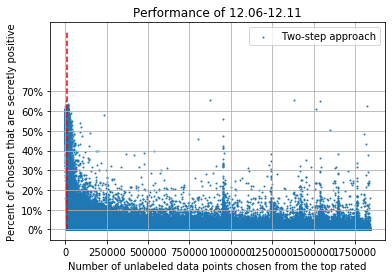

In [19]:
plt.scatter(  #画散点图
    range(len(results05060708091011)), list(results05060708091011['output_stp_mean']),
    s=1  #点大小
)

vals = plt.gca().get_yticks()  #vals为y轴的刻度位置列表
print(vals)
plt.yticks(vals, ['%.0f%%' % (v*100) for v in vals]) #在y轴原刻度位置vals上修改数值
plt.xlabel('Number of unlabeled data points chosen from the top rated')
plt.ylabel('Percent of chosen that are secretly positive')
plt.legend([
    'Two-step approach'
])
plt.plot([len(results_chuzuche), len(results_chuzuche)], [0, 1 ], 'r--')
plt.title('Performance of 12.06-12.11')
plt.grid()
plt.show()

[-0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7]


D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


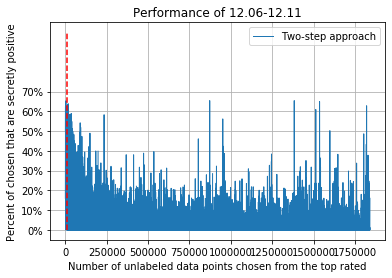

In [20]:
plt.plot(#画折线图
    range(len(results05060708091011)), list(results05060708091011['output_stp_mean']),
    lw = 1 #折线图的线条宽度
)

vals = plt.gca().get_yticks()  #vals为y轴的刻度位置列表
print(vals)
plt.yticks(vals, ['%.0f%%' % (v*100) for v in vals]) #在y轴原刻度位置vals上修改数值
plt.xlabel('Number of unlabeled data points chosen from the top rated')
plt.ylabel('Percent of chosen that are secretly positive')
plt.legend([
    'Two-step approach'
])
plt.plot([len(results_chuzuche), len(results_chuzuche)], [0, 1 ], 'r--')
plt.title('Performance of 12.06-12.11')
plt.grid()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


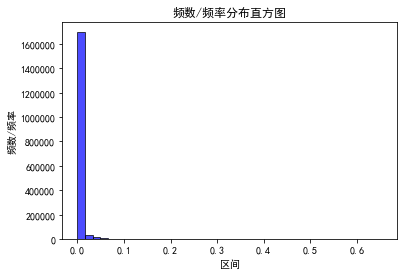

In [21]:
import matplotlib
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号


plt.hist(results05060708091011['output_stp_mean'], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()

# 1206-1211  space、time、all中识别出的出租车车辆交叉数

In [11]:
import pandas as pd

In [19]:
results_space=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_results.csv'),header=0)
results_time=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_results_time.csv'),header=0)
results_all=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_results_all.csv'),header=0)
print('1206-space&time识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'))))
print('1206-space&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1206-time&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1206-space&time&all识别出的出租车车辆交叉数：%d'%(len(
    pd.merge(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'),
             results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'
            ))))

1206-space&time识别出的出租车车辆交叉数：9794
1206-space&all识别出的出租车车辆交叉数：10174
1206-time&all识别出的出租车车辆交叉数：9796
1206-space&time&all识别出的出租车车辆交叉数：9363


In [20]:
results_space=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_results.csv'),header=0)
results_time=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_results_time.csv'),header=0)
results_all=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_results_all.csv'),header=0)
print('1207-space&time识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'))))
print('1207-space&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1207-time&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1207-space&time&all识别出的出租车车辆交叉数：%d'%(len(
    pd.merge(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'),
             results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'
            ))))

1207-space&time识别出的出租车车辆交叉数：9853
1207-space&all识别出的出租车车辆交叉数：10179
1207-time&all识别出的出租车车辆交叉数：9815
1207-space&time&all识别出的出租车车辆交叉数：9389


In [21]:
results_space=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_results.csv'),header=0)
results_time=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_results_time.csv'),header=0)
results_all=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_results_all.csv'),header=0)
print('1208-space&time识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'))))
print('1208-space&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1208-time&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1208-space&time&all识别出的出租车车辆交叉数：%d'%(len(
    pd.merge(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'),
             results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'
            ))))

1208-space&time识别出的出租车车辆交叉数：9822
1208-space&all识别出的出租车车辆交叉数：10235
1208-time&all识别出的出租车车辆交叉数：9909
1208-space&time&all识别出的出租车车辆交叉数：9443


In [22]:
results_space=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_results.csv'),header=0)
results_time=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_results_time.csv'),header=0)
results_all=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_results_all.csv'),header=0)
print('1209-space&time识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'))))
print('1209-space&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1209-time&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1209-space&time&all识别出的出租车车辆交叉数：%d'%(len(
    pd.merge(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'),
             results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'
            ))))

1209-space&time识别出的出租车车辆交叉数：9996
1209-space&all识别出的出租车车辆交叉数：10354
1209-time&all识别出的出租车车辆交叉数：10051
1209-space&time&all识别出的出租车车辆交叉数：9610


In [23]:
results_space=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_results.csv'),header=0)
results_time=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_results_time.csv'),header=0)
results_all=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_results_all.csv'),header=0)
print('1210-space&time识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'))))
print('1210-space&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1210-time&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1210-space&time&all识别出的出租车车辆交叉数：%d'%(len(
    pd.merge(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'),
             results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'
            ))))

1210-space&time识别出的出租车车辆交叉数：9907
1210-space&all识别出的出租车车辆交叉数：10218
1210-time&all识别出的出租车车辆交叉数：9956
1210-space&time&all识别出的出租车车辆交叉数：9492


In [24]:
results_space=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_results.csv'),header=0)
results_time=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_results_time.csv'),header=0)
results_all=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_results_all.csv'),header=0)
print('1211-space&time识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'))))
print('1211-space&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1211-time&all识别出的出租车车辆交叉数：%d'%(len(pd.merge(results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],
                                                results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'))))
print('1211-space&time&all识别出的出租车车辆交叉数：%d'%(len(
    pd.merge(pd.merge(results_space[(results_space['truth']==1)&(results_space['output_bag']==1)],
                                                results_time[(results_time['truth']==1)&(results_time['output_bag']==1)],how='inner',on='car_id'),
             results_all[(results_all['truth']==1)&(results_all['output_bag']==1)],how='inner',on='car_id'
            ))))

1211-space&time识别出的出租车车辆交叉数：9635
1211-space&all识别出的出租车车辆交叉数：10002
1211-time&all识别出的出租车车辆交叉数：9674
1211-space&time&all识别出的出租车车辆交叉数：9183
